***Original dataset is from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation*** 


***But Csv file is downloaded from https://www.kaggle.com/elikplim/car-evaluation-data-set?select=car_evaluation.csv***

### Objective : Classify the condition of the car

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


***We can see there is no NULL values in our dataset***

In [8]:
data = df.copy()

In [9]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA

In [10]:
data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

*As we can observe there are only few different categories in each feature*

**Now let's observe each feature seperately**

In [11]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

med      432
vhigh    432
high     432
low      432
Name: buying, dtype: int64


med      432
vhigh    432
high     432
low      432
Name: maint, dtype: int64


4        432
5more    432
3        432
2        432
Name: doors, dtype: int64


4       576
more    576
2       576
Name: persons, dtype: int64


med      576
big      576
small    576
Name: lug_boot, dtype: int64


med     576
high    576
low     576
Name: safety, dtype: int64


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




## VISUALIZATION

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
sns.set_style(style='whitegrid')

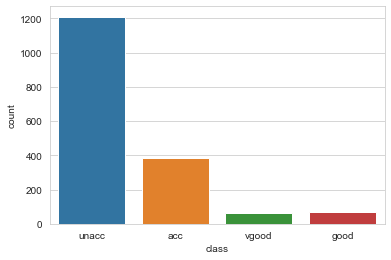

In [14]:
sns.countplot(data['class']);

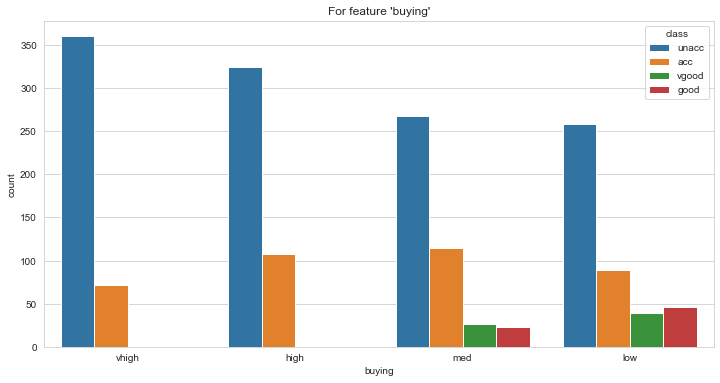

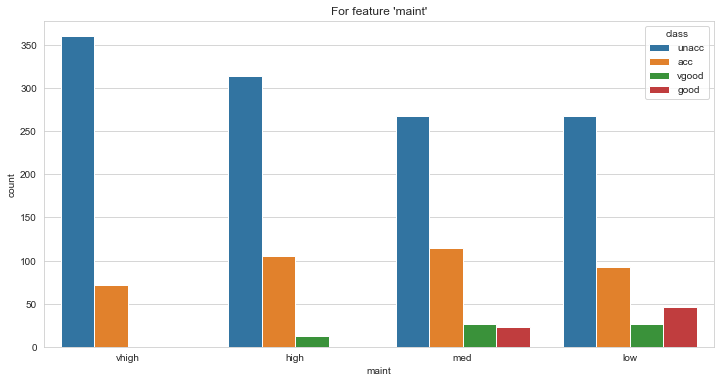

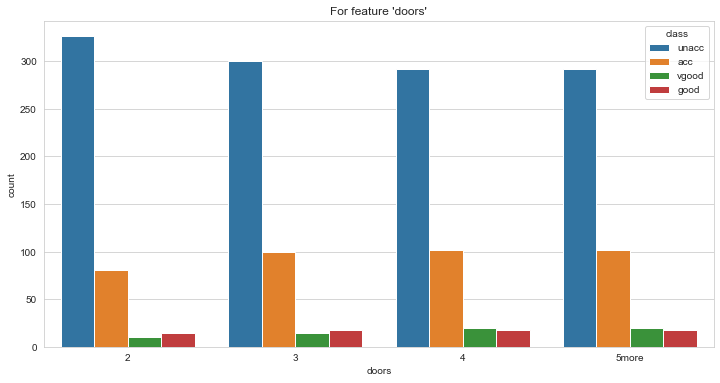

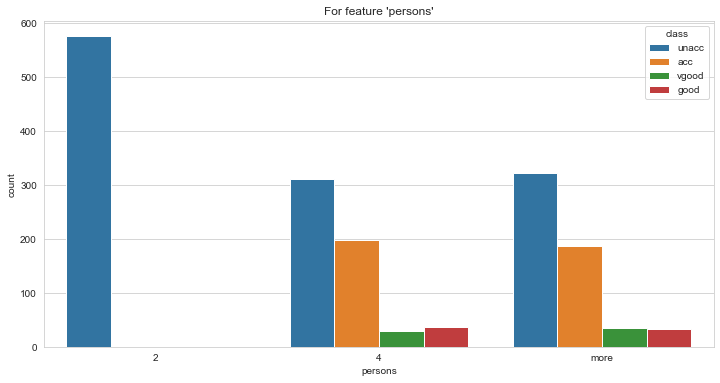

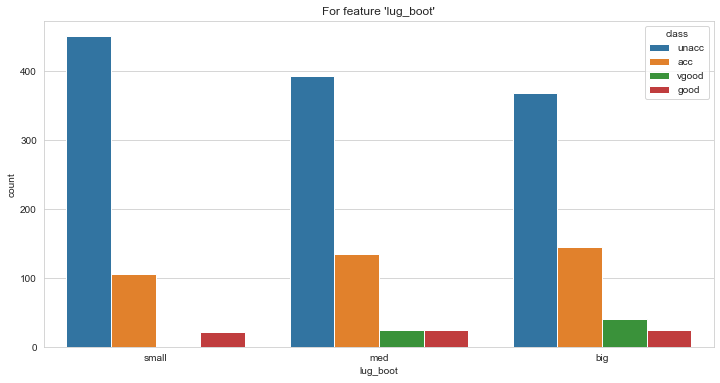

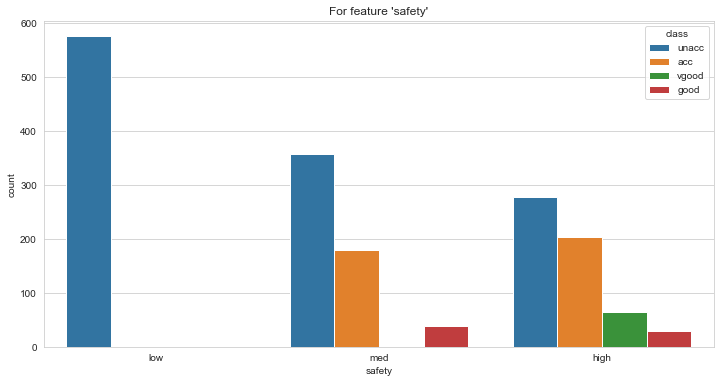

In [15]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class']);

## Dummifying categories into integer values

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [19]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


***Heatmap of the columns on dataset with each other. It shows Pearson's correlation coefficient of column w.r.t other columns.***

<AxesSubplot:>

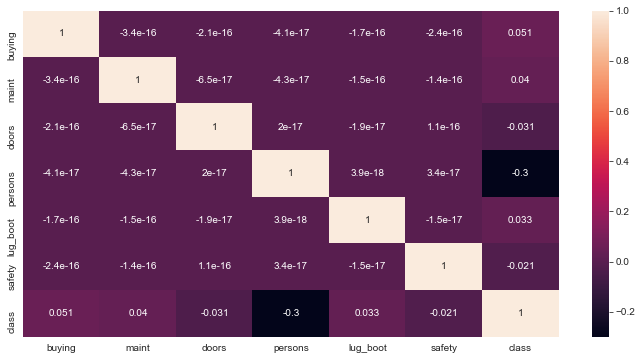

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

**Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class'.**

**So, plotting these columns with each other or doing any analysis on them may not give any productive output.**

## Train Test Split

In [21]:
X = data.drop('class',axis=1)
y = data['class']

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN CLASSIFIER

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
knn=KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.8670520231213873

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       118
           1       0.54      0.37      0.44        19
           2       0.93      0.96      0.94       358
           3       0.92      0.46      0.61        24

    accuracy                           0.87       519
   macro avg       0.77      0.63      0.68       519
weighted avg       0.86      0.87      0.86       519



In [28]:
avg_score=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

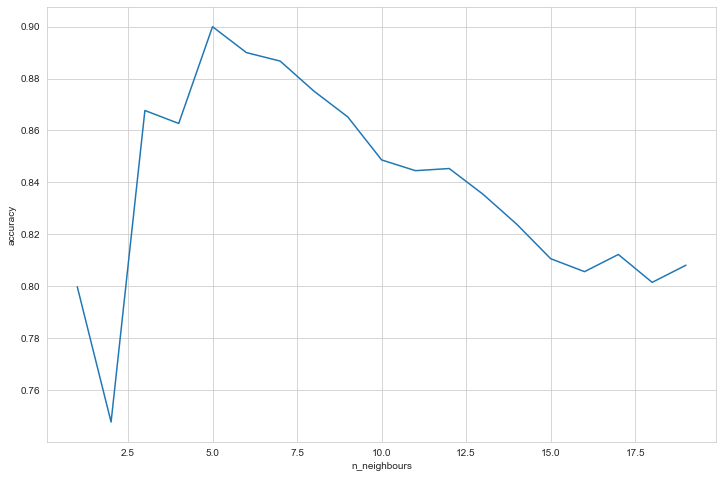

In [29]:
plt.figure(figsize=(12,8))
plt.plot(range(1,20),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

***So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.***

***So, with KNN Classification algorithm, we are able to achieve accuracy around 90%***

## DECISION TREE CLASSIFIER

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier(random_state=0)

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
dtree_rep = tree.export_text(dtree)
print(dtree_rep)

|--- feature_3 <= 0.50
|   |--- class: 2
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   

In [34]:
y_pred = dtree.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9653179190751445

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.90      0.79      0.84        24

    accuracy                           0.97       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.97      0.97      0.97       519



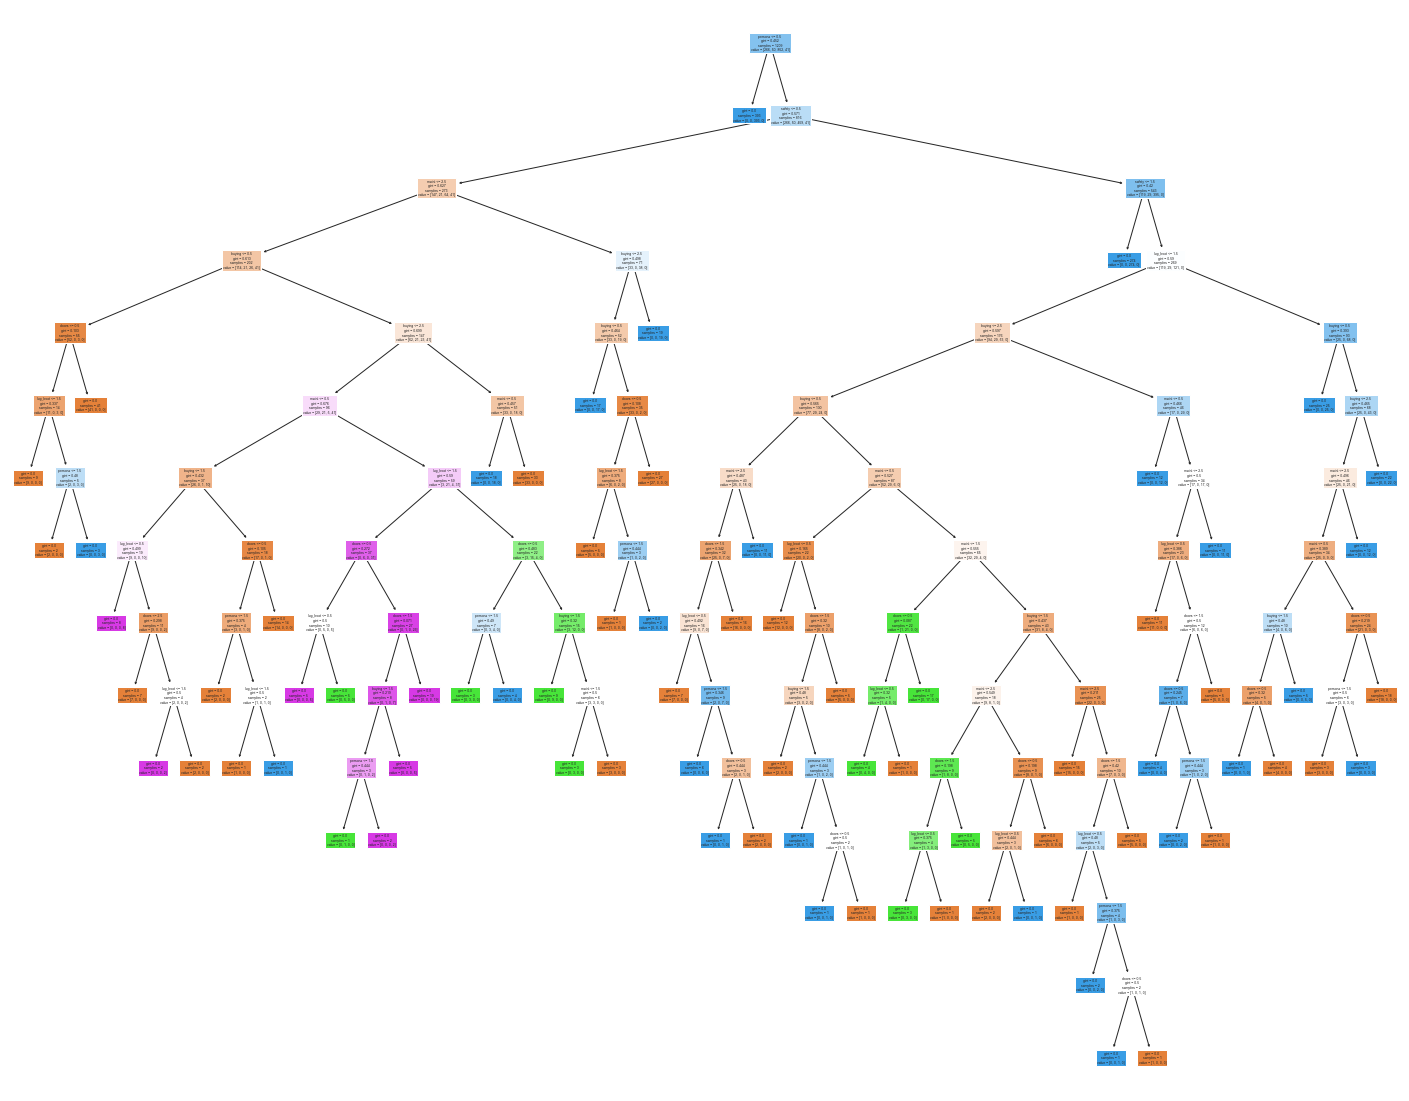

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X.columns),  
                   filled=True)

***From Decision Tree Classifier we get the accuracy of 96.5% which is better than KNN classifier.***